In [1]:
import os
import sys
sys.path.append(os.path.abspath('../../..')) 
from plotting_utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

%matplotlib inline
set_matplotlib_style()

In [36]:
data_path = 'data/ppo-complete-sweep_data.csv'
df = pd.read_csv(data_path)



df = df.groupby(['run_id', 'global_step', 'learning-rate', 'count', 'beta' ,'gym-id', 'num-steps'], as_index=False)[['episodic_return', 'episode_length']].mean()

df["global_step_bin"] = (df["global_step"] // 5000 + 1) * 5000  # Floors to the nearest 10,000
df_binned = df.groupby(["global_step_bin", "run_id", 'learning-rate', 'beta', 'count', 'gym-id', 'num-steps'], as_index=False)[["episodic_return", "episode_length"]].mean()

# print(df_binned)
df = df_binned




/Users/mahshidrahmanihanzaki/Documents/Python_Projects/PPO-implementation/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3550: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        global_step_bin    run_id  learning-rate  beta  count          gym-id  \
0                  5000  00ue1g7z       0.000025     1  False  MountainCar-v0   
1                  5000  01gmjt5c       0.002500     1  False  MountainCar-v0   
2                  5000  02ehbrul       0.002500     1  False  MountainCar-v0   
3                  5000  03lnngio       0.002500     1  False  MountainCar-v0   
4                  5000  048y3230       0.000250     1   True  MountainCar-v0   
...                 ...       ...            ...   ...    ...             ...   
118972           505000  zg71totz       0.000250     1   True  MountainCar-v0   
118973           505000  zgobctam       0.000025     1   True  MountainCar-v0   
118974           505000  zl9ah5ab       0.000250     1   True  MountainCar-v0   
118975           505000  zozgnofu       0.000250     1   True  MountainCar-v0   
118976           505000  zq27zssz       0.000250     1   True  MountainCar-v0   

        num-steps  episodic

Empty DataFrame
Columns: [global_step_bin, run_id, learning-rate, beta, count, gym-id, num-steps, episodic_return, episode_length]
Index: []
False
True
$\times\mathdefault{10^{5}}\mathdefault{}$


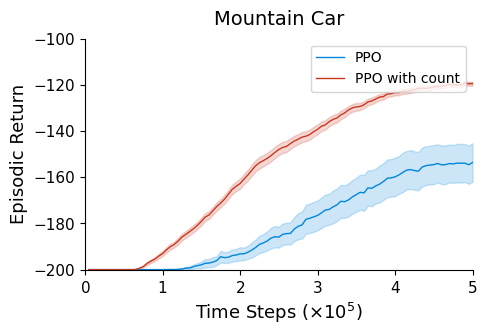

In [59]:
label_map = {True: "PPO with count", False: "PPO"}

set_matplotlib_style(style='default')
max_step = int(5e5)

determ_env_df = df[
  (df['learning-rate'] > 0.002) &
  (df['global_step_bin'] <= int(5e5))
]
print(determ_env_df[determ_env_df['count'] == 'True'])

len_classes = 2
color_palette = get_color_palette(n=len_classes)

for env_name, group in df.groupby('count'):
  print(env_name)

for env_name, group in determ_env_df.groupby('gym-id'):
  group['count_label'] = group['count'].map(label_map)

  sns.lineplot(
    group, x='global_step_bin', y='episodic_return', hue='count_label',
    errorbar=t_distrib, palette=color_palette)
  
  plt.title(f'Mountain Car')
  set_fig_labels('Time Steps', 'Episodic Return', xsci=True)


  plt.ylim(-200, -100)
  plt.xlim(0, 5e5)
  plt.legend(loc='upper right')

env_name = 'MountainCar_performance'
save_fig_versions(f'{standardize_env_name(env_name)}', type='png',dir='./figures/')

plt.show()




In [4]:
label_map = {0.0: "PPO", 0.001: "PPO with count"}

determ_env_df = df[
  ~df['env_name'].str.contains('-rand') &
  (
    (
      (df['rl_start_step'] > 100000) &
      
      df['ae_recon_loss']
    ) |
    ~df['ae_recon_loss']
  ) &
  ((df['Model Type'] == 'Continuous') | (df['Model Type'] == 'Discrete'))
]
determ_env_df = determ_env_df.dropna()
determ_env_df = determ_env_df[determ_env_df['beta'].isin([0.0, 0.001])]


set_matplotlib_style(style='4-row')
determ_env_df = determ_env_df[determ_env_df['count']]
# determ_env_df = determ_env_df['beta'].isin([0.0, 0.001])


for env_name, group in determ_env_df.groupby(['count']):
  env_name = env_name[0]

  group[''] = group['beta'].map(label_map)
  hue_labels = group['beta'].apply(lambda x: f'beta = {x}')

  
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(7e5)
  rl_start_step = group.iloc[0]['rl_start_step']

  print(group.groupby(['beta'])['experiment_key'].nunique())
  len_classes = len(group.groupby(['beta'])['experiment_key'].nunique())
  print(group.groupby(['beta'])['experiment_key'].nunique())
  color_palette = get_color_palette(n=len_classes)
  sns.lineplot(
    group, x='step', y='ep_length', hue='beta_label',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
  plt.title(f'{standardize_env_name(env_name)}')
  set_fig_labels('Time Steps', 'Episode Length', xsci=True)
  plt.xlim(rl_start_step, max_step)
  
  max_y = group['ep_length'].max()
  max_y = int(np.ceil(max_y / 100)) * 100
  plt.ylim(0, max_y)
  plt.gca().set_yticks([0, max_y // 2, max_y])
  plt.legend(loc='upper right')



  save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
  plt.show()

KeyError: 'env_name'